In [1]:
# import internal files
import emulators
import sample
import historymatch
import plot

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy import stats

plt.rcParams.update({'font.size': 10})

np.random.seed(4)

import importlib

In [2]:
def model_eqn_1(x, theta_0, theta_1, theta_2):
    return theta_0 + theta_1*(x) + theta_2*(x**2)

function1 = np.vectorize(model_eqn_1)

In [3]:
def model_eqn_2(x, theta_0, theta_1, theta_2):
    return theta_0 - theta_1*np.sin(x) + (theta_2**1)*np.cos(x)

function2 = np.vectorize(model_eqn_2)

In [4]:
# define parameter space
var_method = 0.01

theta_0_bound = np.array([-1, 1]).reshape(1,-1)
theta_1_bound = np.array([-1, 1]).reshape(1,-1)
theta_2_bound = np.array([-1, 1]).reshape(1,-1)

parameter_bounds = np.concatenate((theta_0_bound, theta_1_bound, theta_2_bound), axis=0)

theta_0_vals = np.linspace(parameter_bounds[0,0], parameter_bounds[0,1], 100)
theta_1_vals = np.linspace(parameter_bounds[1,0], parameter_bounds[1,1], 100)
theta_2_vals = np.linspace(parameter_bounds[2,0], parameter_bounds[2,1], 100)

theta_vals = np.concatenate((theta_0_vals.reshape(1,-1), theta_1_vals.reshape(1,-1), theta_2_vals.reshape(1,-1)), axis=0)

In [5]:
Nx = 4

def toy_model(theta_0, theta_1, theta_2):
    
    x_bound = np.array([0.1, 1])
    Nx = 4
    xvals = np.linspace(x_bound[0], x_bound[-1], Nx)

    outputs =  []
    for x in xvals:
        output = theta_0 + (theta_1**1)*(x) + theta_2*(x**2)
        outputs.append(output)
    for x in xvals:
        output = theta_0 - theta_1*np.sin(x) + (theta_2**1)*np.cos(x)
        outputs.append(output)
    return np.array(outputs)

In [6]:
# generate observational data with some uncertainty
true_parameters = [-0.1, 0.3, 0.6]

var_obs = 0.001 # observational uncertainty variance

error_obs = np.random.normal(0, np.sqrt(var_obs), 2*Nx)

obs_data = toy_model(*true_parameters) + error_obs


In [7]:
nwaves = 3
ndim = 3

In [8]:
importlib.reload(historymatch)

# initialise history matching class
HM = historymatch.HistoryMatch(obs_data,
                               ndim, 'GP', 'ellipsoid')

In [9]:


ToyModel = historymatch.Simulator(HM)
ToyModel.set_simulator(toy_model)

HM.set_observations(obs_data, np.sqrt(var_obs))
HM.initialize_volume([-1,-1,-1], [1,1,1])

results = HM.run(nwaves=nwaves)

Running wave 1
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Relative nonimplausible volume remaining: 0.056
Running wave 2
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Relative nonimplausible volume remaining: 0.038
Running wave 3
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Emulating...
Relative nonimplausible volume remaining: 0.005


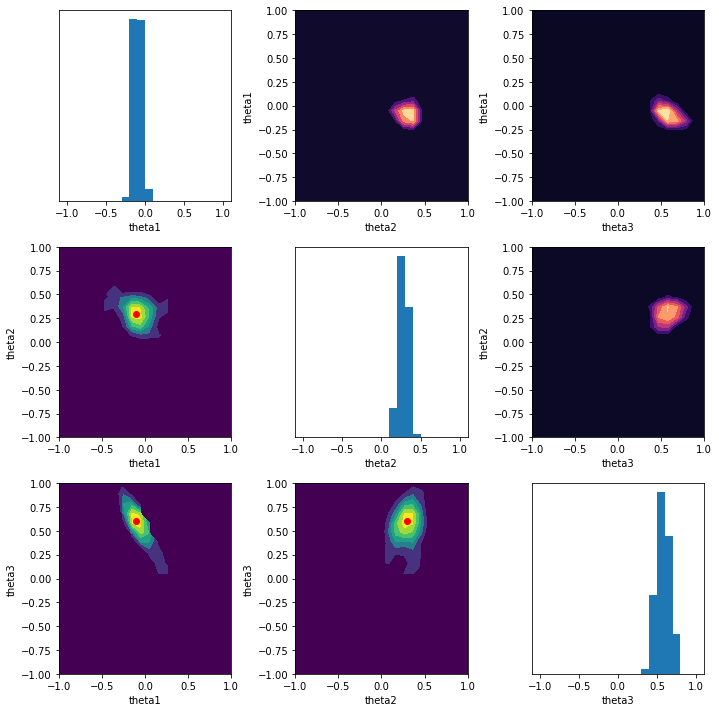

In [16]:
importlib.reload(plot)

fig, axes = plt.subplots(ndim,ndim,figsize=(10,10))
#plot.opticaldepth_1D(results.samples[0], parameter_bounds[0], parameter = 0, bins=20, Fig=(fig,ax1))
    
#plot.plot_implausibility2D(results.samples[0], parameter_bounds, [0,1], bins=20)

plot.plotcorner(results.samples[2], parameter_bounds, 3, Fig=(fig,axes), labels=('theta1', 'theta2', 'theta3'))
axes[1,0].scatter(true_parameters[0],true_parameters[1], color='red')
axes[2,0].scatter(true_parameters[0],true_parameters[2], color='red')
axes[2,1].scatter(true_parameters[1],true_parameters[2], color='red')

In [11]:
#fig = plt.figure(figsize=(10,8))
#ax = plt.axes(projection='3d')

#theta_test = results.test_pts
#nonimp = results.regions

#ax.scatter(theta_test[2][:,0], theta_test[2][:,1], theta_test[2][:,2], s=3, color='blue', alpha=0.1)
#ax.scatter(nonimp[1][:,0], nonimp[1][:,1], nonimp[1][:,2], color='red')

#print(np.max(theta_test[1][:,0]))
#print(np.max(nonimp[1][:,0]))





In [12]:
X_3D_train = np.random.uniform(-1, 1, (20, 3))

X_3D_test = np.random.uniform(-1, 1, (5000, 3))

rx, ry, rz = np.linspace(-1, 1, 20), np.linspace(-1, 1, 20), np.linspace(-1, 1, 20)
gx, gy, gz = np.meshgrid(rx, ry, rz)

X_3D = np.c_[gx.ravel(), gy.ravel(), gz.ravel()]

Y_3D_train = model_eqn_1(0.1, X_3D_train[:,0], X_3D_train[:,1], X_3D_train[:,2])

In [13]:
Y_3D_test = model_eqn_1(0.1, X_3D_test[:,0], X_3D_test[:,1], X_3D_test[:,2])

In [14]:
#print(Y_3D_test)

In [15]:
importlib.reload(emulators)
GP = emulators.Gaussian_Process(X_3D_train, X_3D_test, Y_3D_train)
mu1, cov1, sd1 = GP.emulate()
print(GP.sigma_f)
#print(mu1)

AttributeError: module 'emulators' has no attribute 'Gaussian_Process'

In [ ]:
GP.optimize()

In [ ]:
mu2, cov2, sd2 = GP.emulate()
print(GP.l)

z = -0.06387078

In [ ]:
print(sd1[0])
print(sd2[0])
print(mu1 - Y_3D_test)
print(mu2 - Y_3D_test)

In [ ]:
HMtest = historymatch.HistoryMatch(z,
                               3, 'GP', 'ellipsoid')

In [ ]:
imp1 = HMtest.implausibility(mu1, z, sd1, 0, var_obs)
imp2 = HMtest.implausibility(mu2, z, sd2, 0, var_obs)
print(imp1)
print(imp2)

In [ ]:
samp1 = np.concatenate((X_3D_test, imp1.reshape(-1,1)), axis=1)
samp2 = np.concatenate((X_3D_test, imp2.reshape(-1,1)), axis=1)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,7))

plot.plot_implausibility2D(samp1, parameter_bounds, [0,1], bins=20, Fig=(fig, ax1), colorbar=False, 
                            labels=None, plot_kwargs=None)
plot.plot_implausibility2D(samp2, parameter_bounds, [0,1], bins=20, Fig=(fig, ax2), colorbar=False, 
                            labels=None, plot_kwargs=None)